# Handwritten Digit Recognizer #
Reference for description: https://www.kaggle.com/competitions/digit-recognizer/overview

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike. The MNIST dataset represents handwritten images as arrays of digits, with digit value corresponding to darkness in the image. 

Below, the goal is to build a model to correctly identify digits from a dataset 42000 handwritten images. This can be approached numerous ways, but in this case,  the problem will be approached as a multi-class classification problem, as the target variable (classification as a digit 0-9) is a non-continuous value. Four different classification models will be evaluated below, comparing accuracy score to select the model for submission. 


### Set-Up ###

In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
## Importing relevant packages 

import numpy as np 
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, max_error, r2_score
import matplotlib.pyplot as plt
from PIL import Image as im
%matplotlib inline


data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv').to_numpy()
example_sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv').to_numpy()
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv').to_numpy()
    
Y = data[:,0] # this is the actual digit drawn by the user
X = data[:,1:] # these are the pixel representations: columns 1-784 for a digit in Y. Value => Darkness

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


### Data Visualization ###
To understand how the images look, a few will be generated below. Dataset information:
https://www.kaggle.com/competitions/digit-recognizer/dat

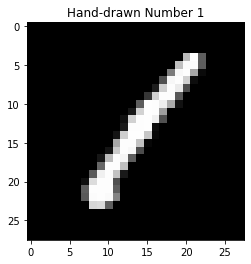

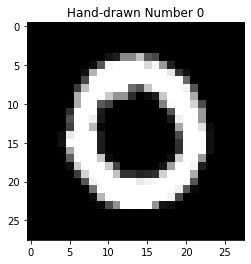

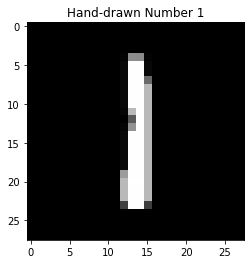

In [2]:
plt.figure(figsize = (10,4))
for i in range(3):
    target = Y[i]
    image_row = X[i]
    plt.imshow(np.reshape(image_row, (28,28)), cmap = 'gray')
    plt.title("Hand-drawn Number %d" % target)
    plt.show()

# Model Experimentation #

In [3]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.2)

from sklearn.linear_model import SGDClassifier
from xgboost.sklearn import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
    

def class_model (model_name, model_initiation):
      model = model_initiation
      model.fit(X_train, Y_train)
      preds = model.predict(X_valid)
      acc_score = accuracy_score (Y_valid, preds) 
      print (model_name + " Accuracy Score:" + str(acc_score))

In [4]:
class_model("XGBClass", XGBClassifier())

XGBClass Accuracy Score:0.9746428571428571


In [5]:
class_model("SGDClass", SGDClassifier())

SGDClass Accuracy Score:0.8770238095238095


In [6]:
class_model ("KNeighbours", KNeighborsClassifier())

KNeighbours Accuracy Score:0.9673809523809523


In [7]:
class_model ("RandomForestClassifer", RandomForestClassifier())

RandomForestClassifer Accuracy Score:0.9615476190476191


Conclusion: XGBoost Classification produces the strongest results, with an accuracy score of 0.97. As such, it will be selected for the final submission. 

### Final Model Creation ###

In [8]:
# Creating the final model to generate submission predictions
prediction_model = XGBClassifier()
prediction_model.fit(X,Y)
preds = prediction_model.predict(test_data)


#### Submitting Results ####

In [9]:
from pandas import Series

col1 = Series(np.arange(1,28001))
col2 = preds
combined_array=np.column_stack((col1,col2))
df = pd.DataFrame(combined_array, columns = ['ImageId', 'Label'])
df.to_csv('submission.csv', index=False)
